# Ball Drop Challenge

Prepared by: Pablo Giuliani

The purpose of this challenge is for you to build an emulator using a Gaussian Process from scikit-learn:
https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html#sphx-glr-auto-examples-gaussian-process-plot-gpr-noisy-targets-py

to calibrate a model for a particle dropped from a height on a planet in the solar system. 

Below we sketch the first parts of the code, including the differential equation solver model which contains three parameters: a drag coefficient proportional to speed, another one proportional to the speed squared, and gravity. Your task is to

- Train the Gaussian Process on various values of the parameters
- Define your likelihood and prior functions
- Calibrate your model through a Metropolis algorithm and obtain posterior samples
- Estimate the value of the gravity to answer in which planet was this particle dropped.

You can use the [Practical Example](https://github.com/ascsn/2023-FRIB-TA-Summer-School/blob/main/practical-bayes/Practical%20example.ipynb) notebook from Pablo's session to guide you on the Metropolis and Bayesian Calibration part!


In [15]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp


In [16]:
#You will probably need something from:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [17]:
# Define the global variables

mass = 1.0

# Define the time span
t_span = (0, 15)

t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Define the initial condition
initial_conditions = [100, 0.0]

In [18]:
# Define the differential equation
def particle_motion(t, state, args):
    
    drag_coefficient_1,drag_coefficient_2, g =args
    
    position, speed = state
    
    # Calculate the drag force
    drag_force = drag_coefficient_1 * speed +drag_coefficient_2*speed**2
    
    # Calculate the acceleration
    acceleration = -g + (drag_force) / mass
    
    return [speed, acceleration]


# ODE Solver

def system_solution(d_coeff_1,d_coeff_2,gravity):
    return solve_ivp(particle_motion, t_span, initial_conditions,rtol=10**(-10), dense_output=True,
                     atol=10**(-10),t_eval=t_eval,args=[[d_coeff_1,d_coeff_2,gravity]])



In [19]:
solution_example=system_solution(0.01,0.002,10)

t=solution_example.t
position=solution_example.y[0]
speed=solution_example.y[1]


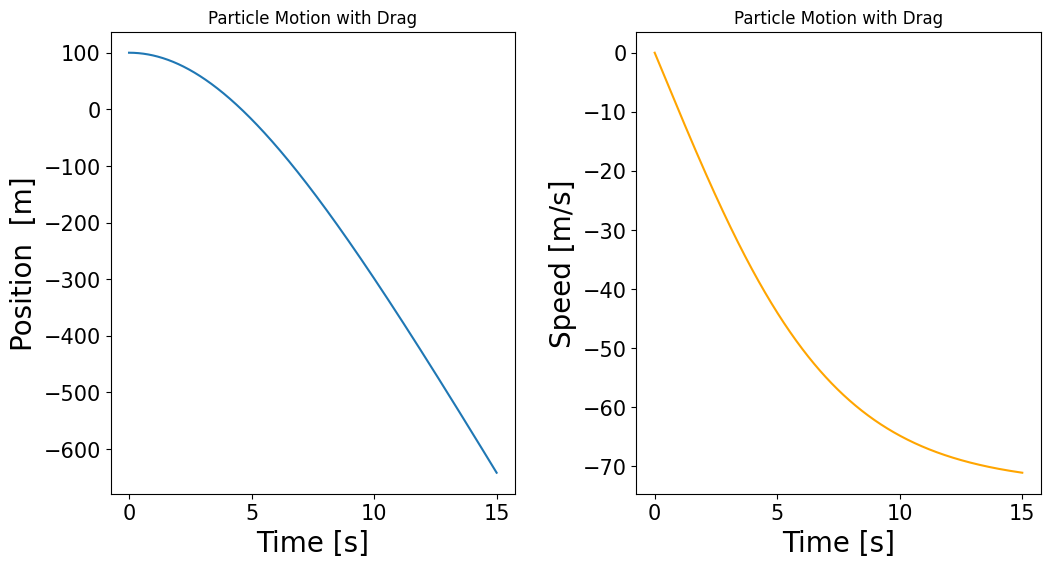

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Set the figsize according to your preference



axes[0].plot(t, position, label='Position')
axes[0].set_xlabel('Time [s]',fontsize=20)
axes[0].set_ylabel('Position  [m]',fontsize=20)
axes[0].set_title('Particle Motion with Drag')


axes[1].plot(t, speed, label='Speed',color='orange')
axes[1].set_xlabel('Time [s]',fontsize=20)
axes[1].set_ylabel('Speed [m/s]',fontsize=20)
axes[1].set_title('Particle Motion with Drag')


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3) 

plt.rc('xtick', labelsize=15)  
plt.rc('ytick', labelsize=15)

# Display the figures
plt.show()

In [21]:
noise_level=5

In [22]:
y_vals_observed=np.array([103.62232114, 105.29080317, 100.44339264,  89.68472992,
        95.66531079,  95.02952019, 100.59440023, 101.22990018,
        92.65980853,  92.69221497,  97.13731823,  97.36679435,
        99.10359091,  94.17310372,  86.32484148,  92.91443669,
        91.83084944,  80.57475841,  77.13414132,  76.94333708,
        77.18032093,  65.69391499,  68.67817178,  81.44078949,
        80.30046612,  88.07647124,  67.67693737,  82.78013748,
        75.1125216 ,  77.9535926 ,  76.65581428,  70.12187839,
        68.43959951,  70.75166396,  69.07837781,  63.77735318,
        51.14022   ,  62.5769828 ,  62.81513541,  46.33905685,
        59.81468355,  46.68396545,  52.91635131,  39.19593866,
        43.29087894,  51.35314232,  41.62299135,  41.56184399,
        37.5931934 ,  39.9917403 ])

In [23]:
t_values=np.array([ 0.54267249,  1.99483679,  2.50687832,  2.64532764,  2.72700296,
        2.86483181,  2.91343506,  2.93586464,  3.21823105,  3.52676705,
        3.67022733,  3.76974703,  4.08435481,  5.0298317 ,  5.11431331,
        5.48832694,  5.49984705,  6.09810127,  6.81743628,  7.38473315,
        7.58085367,  7.64712002,  7.78169343,  8.09725527,  8.11112092,
        8.29254051,  8.44779801,  8.48286677,  8.5641226 ,  8.84258994,
        8.9015199 ,  9.61055831,  9.62224796, 10.01454791, 10.31744269,
       10.40774307, 10.95442955, 10.97667019, 11.3065361 , 11.39017067,
       11.58646398, 11.91024335, 12.03612255, 12.03873328, 12.30519789,
       12.41452534, 12.9007328 , 13.02796576, 13.94053357, 13.94763475])

In [24]:
#The error assumed in the observations. We assume it is Gaussian and the same on all of them
noise_level=5

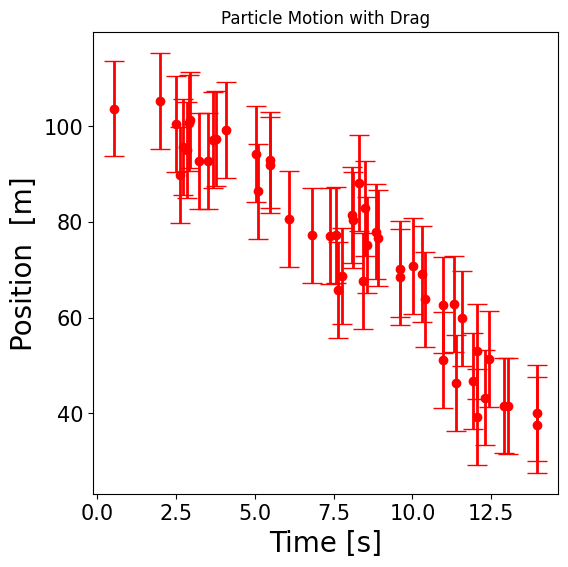

In [25]:
fig, axes = plt.subplots(1, 1, figsize=(6, 6))  # Set the figsize according to your preference

# Plot the first figure

# axes.plot(t_exact, position_exact, label='Position')


axes.errorbar(t_values, y_vals_observed, np.full(len(y_vals_observed),2*noise_level),
                   fmt='o', linewidth=2,capsize=7,label='Data [95% Errors]',color='r')

axes.set_xlabel('Time [s]',fontsize=20)
axes.set_ylabel('Position  [m]',fontsize=20)
axes.set_title('Particle Motion with Drag')






# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)  # Set the spacing according to your preference

plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)

# Display the figures
plt.show()

This is how the data looks like. 

Now it is your turn, check the documentation for training a Gaussian Process emulator at https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html#sphx-glr-auto-examples-gaussian-process-plot-gpr-noisy-targets-py, and start building your emulator for system_solution(d_coeff_1,d_coeff_2,gravity).

Hint: start by making a function that takes four variables, a time value t, and the three parameters. This is the function you want your GP to learn from. Good luck!

Also, once you passed through the painful process of building your own GP, go and check the BAND tools that make this way easier: 

https://surmise.readthedocs.io/en/latest/examples.html

In [28]:
def my_function(t, param_1, param_2, param_3):
    return param_1  +  param_2 * t  +  param_3 * t ** 2